# ⚠️ 본 노트북은 실제 데이터를 포함하지 않으며, 구조 학습을 위한 예시 기반 더미 데이터만 포함됩니다.

# 라이브러리

In [1]:
! pip3 install koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 50.2 MB/s eta 0:00:00


In [3]:
!pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 23.0 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
from faker import Faker
import random

# 데이터 불러오기

In [5]:
fake = Faker()
Faker.seed(0)
np.random.seed(0)
random.seed(0)

# 구성할 컬럼: Unnamed: 0, user_uuid, URL, timestamp, date, response_code, method, cleaned_url
num_rows = 1000  # 예시로 1000개 생성

dummy_data = {
    "Unnamed: 0": range(num_rows),
    "user_uuid": [fake.uuid4() for _ in range(num_rows)],
    "URL": [random.choice([
        "api/signup/form",
        "api/search/language?name=영어",
        "api/users/id/template",
        "verify_phone?next_url=/@testuser",
        "@user_id",
        "api/login/verify?session_id=12345",
        "api/job/detail?job_id=5678"
    ]) for _ in range(num_rows)],
    "timestamp": [fake.date_time_between(start_date="-30d", end_date="now") for _ in range(num_rows)],
    "date": [fake.date_between(start_date="-30d", end_date="today") for _ in range(num_rows)],
    "response_code": [random.choice([200, 201, 400, 401, 403, 404, 500]) for _ in range(num_rows)],
    "method": [random.choice(["GET", "POST", "PUT", "DELETE"]) for _ in range(num_rows)],
    "cleaned_url": []  # URL에서 query string 제거한 형태
}

# cleaned_url 생성
for url in dummy_data["URL"]:
    base = url.split("?")[0]
    dummy_data["cleaned_url"].append(base)

# DataFrame 생성
dummy_log_df = pd.DataFrame(dummy_data)
dummy_log_df.head()

,Unnamed: 0,user_uuid,URL,timestamp,date,response_code,method,cleaned_url
0,0,e3e70682-c209-4cac-a29f-6fbed82c07cd,api/job/detail?job_id=5678,2025-06-05 09:22:07.646330,2025-06-01,403,POST,api/job/detail
1,1,f728b4fa-4248-4e3a-8a5d-2f346baa9455,verify_phone?next_url=/@testuser,2025-06-26 18:10:45.922826,2025-06-22,201,DELETE,verify_phone
2,2,eb1167b3-67a9-4378-bc65-c1e582e2e662,api/job/detail?job_id=5678,2025-06-05 00:52:04.465526,2025-06-12,400,POST,api/job/detail
3,3,f7c1bd87-4da5-4709-9471-3d60c8a70639,verify_phone?next_url=/@testuser,2025-06-04 15:59:17.111606,2025-06-02,401,DELETE,verify_phone
4,4,e443df78-9558-467f-9ba9-1faf7a024204,api/signup/form,2025-06-04 11:54:44.132908,2025-06-27,404,POST,api/signup/form


# Cleaned_URL 추출

In [7]:
# 고유 URL 추출
cleaned_unique_urls = dummy_log_df["cleaned_url"].unique()
print(pd.DataFrame(cleaned_unique_urls, columns=["cleaned_URL"]))

             cleaned_URL
0         api/job/detail
1           verify_phone
2        api/signup/form
3  api/users/id/template
4               @user_id
5    api/search/language
6       api/login/verify


# URL 해석

## 1. 회원가입 및 프로필 작성 관련

- api/(회원가입)/(형식)
    - api: 백엔드에서 데이터를 주고받는 애플리케이션 프로그래밍 인터페이스 경로
    - (회원가입): 회원가입과 관련된 액션을 나타냄
    - (형식): 사용자로부터 입력을 받는 구조를 의미. 이 경우 회원가입 폼

    - 회원가입을 위한 입력 폼을 서버에 요청하거나 데이터를 전달하는 API 경로

- (회원가입)/(단계1)/(이름)
    - (회원가입): 회원가입 단계
    - (단계): 첫 번째 단계
    - (이름): 사용자 이름 또는 실명 입력 단계

    - 회원가입의 첫 번째 단계, 사용자의 이름을 입력받는 UI 화면 경로

- (회원가입)/(단계2)/(학력)
    - (단계2): 두 번째 단계
    - (학력): 학력 정보 입력 단계

    - 회원가입의 두 번째 단계, 학력 정보를 입력받는 화면 또는 API 요청 경로

- (회원가입)/(단계3)/(완료)
    - (단계3): 세 번째 또는 마지막 단계
    - (완료): 완료, 끝났음을 의미

    - 회원가입 과정을 마치고 완료된 상태를 나타내는 화면 (또는 완료 처리)

- api/(사용자)/(ID)/(학력)
    - (사용자): 사용자 관련 리소스
    - (ID): 특정 사용자를 지정
    - (학력): 해당 사용자의 학력 정보

    - 특정 사용자의 학력 데이터를 다루는 API 요청 (불러오기, 추가, 수정 등)

- api/(사용자)/(ID)/(경력)
    - (경력): 경력 정보

    - 특정 사용자의 경력 데이터를 다루는 API 요청 (불러오기, 추가, 수정 등)

- api/(사용자)/(ID)/(프로젝트)
    - (프로젝트): 프로젝트 경험 정보

    - 특정 사용자의 프로젝트 경험 데이터를 다루는 API 요청 (불러오기, 추가, 수정 등)

- api/(사용자)/(ID)/(사진)
    - (사진): 프로필 사진 또는 기타 이미지 파일

    - 특정 사용자의 이미지 업로드나 수정 요청을 처리하는 API 경로

- api/(사용자)/(ID)/(이력서)/(단계)
    - (이력서): 이력서
    - (단계): 이력서 작성의 첫 단계

    - 특정 사용자의 이력서 작성 흐름 중 첫 단계의 데이터 처리 API 요청

## 2. 검색 및 탐색

- api/(검색)/(언어)
    - api: 서버와의 데이터 요청
    - (검색): 검색 기능
    - (언어): 언어 필터/조건

    - 사용자가 특정 언어로 검색했을 때, 해당 언어에 맞는 결과를 요청하는 API

- api/(검색)/(사람)/job_title
    - (사람): 사람 (구직자 등)
    - job_title: 직무/직책

    - 특정 직무를 가진 사람들을 검색하는 API 요청

- api/(검색)/(전문 분야)
    - (전문 분야): 전문 분야

    - 전문 분야(예: 백엔드, 데이터분석 등)로 필터링한 검색 요청

- api/(검색)/(기업)
    - (기업): 기업 목록

    - 기업을 키워드나 필터로 검색할 때 사용하는 API

- api/(검색)/(템플릿)
    - (템플릿): 검색 조건의 기본 틀 (기본 쿼리 제공 등)

    - 검색 페이지에 미리 제공되는 검색 템플릿을 받아오는 API

## 3. 지원 및 채용 퍼널

- (채용 공고)/(공고 ID)/(지원)/(단계1) ~ (채용 공고)/(공고 ID)/(지원)/(단계4)
    - (채용 공고)/(공고 ID): 특정 채용 공고
    - (지원): 지원
    - (단계): 지원 흐름의 각 단계

    - 사용자가 지원하는 과정에서 1단계부터 4단계까지의 각 지원 페이지 (예: 이력서 선택 → 자기소개서 입력 → 확인 → 완료)

- api/(채용 공고)/(공고 ID)/(지원)/(단계1) ~ api/(채용 공고)/(공고 ID)/(지원)/(단계4)
    - 각 지원 단계에서 실제 데이터 제출 혹은 불러오는 백엔드 요청

- api/(채용 공고)/(공고 ID)/bookmark
    - bookmark: 즐겨찾기 또는 저장

    - 특정 채용 공고를 저장(북마크)하는 API 요청

- api/(채용 제안)/(채용 제안 ID)/modal
    - (채용 제안)/(채용 제안 ID): 특정 채용 제안
    - modal: 모달 팝업 UI 요청

    - 채용 제안 상세 내용을 모달 팝업으로 보여줄 때 호출되는 API

## 4. 기업 관련

- (기업)/(기업 ID)/(채용 공고)
    - (기업): 기업 목록
    - (기업 ID): 특정 회사
    - (채용 공고): 그 회사의 채용공고 리스트

    - 특정 기업의 전체 채용공고를 보여주는 페이지

- api/(기업)/(기업 ID)/view
    - view: 상세 보기

    - 특정 기업의 상세 정보를 백엔드에서 요청하는 API

- api/(기업)/(기업 ID)/media
    - media: 회사 이미지/영상 등 콘텐츠

    - 기업 프로필에 포함된 미디어(브로셔, 이미지 등)를 가져오거나 수정하는 API

## 5. 알림 및 설정

- api/(사용자)/notifications
    - notifications: 알림

    - 사용자의 알림 목록을 조회하는 API 요청

- api/(사용자)/email/settings
    - email/settings: 이메일 수신 설정

    - 사용자의 이메일 수신 여부나 알림 설정을 다루는 API

- setting
    - 단일 경로: 사용자 설정 페이지 UI

## 6. SNS / 외부 연동

- api/(사용자)/(사용자 ID)/sns
    - sns: 외부 SNS 계정

    - 특정 사용자의 SNS 연동 상태를 처리하는 API (연결, 해제 등)

- api/(사용자)/(사용자 ID)/profile_image/facebook
    - profile_image/facebook: 페이스북 프로필 이미지 가져오기

    - 페이스북 계정에서 프로필 사진을 가져오는 API 요청

- api/(인증)/(학력)/(학력 ID)
    - (인증): 인증
    - (학력): 학력 정보
    - (학력 ID): 특정 항목

    - 사용자가 입력한 학력 정보를 검증하는 API 요청

- verify_phone
    - 전화번호 인증(문자 수신 등)을 위한 사용자 UI 또는 백엔드 요청

- email_verify
    - 이메일 주소를 인증하기 위한 경로 또는 백엔드 API

## 7. 관리자/내부 전용

- admin/jsi18n
    - jsi18n: JavaScript용 다국어 문자열 (i18n = internationalization)

    - 관리자 화면에서 다국어 처리를 위한 번역 리소스를 JS로 로드하는 경로

- admin/core/profile
    - admin: 관리자 전용 페이지
    - core/profile: 관리자 계정의 프로필

    - 관리자 계정의 기본 프로필을 보여주는 설정/관리 페이지

# 이용률 개선을 위한 준비 과정

- 분석가로서 갖춰야 할 사고 방식
    - 사용자 입장에서 여정(User Journey) 상상해보기
    - 정량 데이터(로그)와 정성 데이터(설문, CS 피드백 등)의 결합
    - 단순 트래킹이 아닌 행동의 의미를 추론하고 개선 아이디어로 연결하는 사고력

## 1. 문제 정의와 목표 설정

- 분석 목표: 단순히 “이용률을 높이자”가 아닌, 구체적인 KPI를 설정
    - 예: 이탈률 감소, 회원가입 전환율 증가, 지원 퍼널 전환률 향상 등

- 핵심 질문 정의
    - 사용자들은 왜 이탈할까?
    - 어떤 단계에서 가장 많이 이탈할까?
    - 이탈하지 않은 사용자들은 어떤 행동을 했을까?

## 2. 데이터 전처리 및 구조 파악

- URL의 분류 태그 붙이기 (검색, 탐색, 지원, 가입 등)
- 이벤트 타입 분류: 조회, 클릭, 작성, 지원 등
- 사용자 정보와 연동할 수 있다면 추가적으로 연령대, 성별, 직무 희망 분야 등의 정보도 고려

## 3. 기초적인 퍼널 흐름 정의

- 행동 흐름 퍼널 구성 예시
    - 검색 -> 채용공고 조회 -> 지원버튼 클릭 -> 이력서 작성 -> 지원 완료
    - 회원가입 -> 프로필 작성 -> 채용공고 탐색

- 퍼널마다 전환율과 이탈 지점을 계산할 수 있는 구조로 만들야 함

## 4. 세션 분석 및 사용자 세그먼트 나누기

- 세션 길이, 방문 페이지 수, 활동 유형에 따라 사용자를 분류
    - 예: 탐색형, 지원목적형, 이탈형, 신규가입형

- 세션 수 대비 이탈률이 높은 사용자 그룹 파악

- 재방문 유저 vs 단발 방문 유저 비교도 핵심 포인트

## 5. 로그 데이터 외에 보완 가능한 지표

- 채용공고의 상태 (마감 여부, 최신순, 노출 상태 등)

- 유료 기업 여부 또는 우선 노출된 채용 여부

- 추천 알고리즘 적용 여부

- 푸시/이메일 마케팅 이력 (CTR, Open Rate 등)

## 6. 사용자 흐름 시각화

- 가설 예시
    - “회원가입 2단계에서 이탈하는 사용자는 교육정보 입력이 번거롭다고 느낀다”
    - “검색 결과가 적은 키워드에 대한 이탈률이 높다”

- 이를 바탕으로 A/B 테스트나 UX 개선 제안 가능

# URL 분류 추출 (RAM 많이 잡아먹음 출력되어 있는 값 확인만 하고 실행 X)

In [8]:
from collections import Counter
from itertools import chain

# URL을 '/' 기준으로 나누고, 빈 문자열은 제거
dummy_log_df["url_parts"] = dummy_log_df["cleaned_url"].dropna().str.strip("/").str.split("/")

# NaN이 아닌 리스트만 추출
valid_parts = dummy_log_df["url_parts"].dropna()

# 모든 URL 파트(flattened list)
all_parts = list(chain.from_iterable(valid_parts))

# 빈도수 집계
part_counts = Counter(all_parts)

# 데이터프레임으로 보기 좋게 정리
part_df = pd.DataFrame(part_counts.items(), columns=["keyword", "count"]).sort_values(by="count", ascending=False)

part_df

,keyword,count
0,api,728
5,form,165
4,signup,165
1,job,148
2,detail,148
3,verify_phone,142
12,login,141
13,verify,141
6,users,140
7,id,140


# 참고할만한 내용

## 세션 번호 부여

In [ ]:
# 유저, 시간 순서로 정렬
dummy_log_df = dummy_log_df.sort_values(by=["user_uuid", "timestamp"]).reset_index(drop=True)

In [9]:
# 이전 행동 시각과의 차이 계산
dummy_log_df["prev_time"] = dummy_log_df.groupby("user_uuid")["timestamp"].shift(1)
dummy_log_df["time_diff"] = (dummy_log_df["timestamp"] - dummy_log_df["prev_time"]).dt.total_seconds()

# 30분(1,800초) 초과되면 새로운 세션 시작
dummy_log_df["new_session"] = (dummy_log_df["time_diff"] > 1800) | (dummy_log_df["time_diff"].isna())

# 각 유저별 세션 ID 부여 (누적합으로 구분)
dummy_log_df["session_id"] = dummy_log_df.groupby("user_uuid")["new_session"].cumsum()

# session_num 부여 (유저마다 1, 2, 3...)
dummy_log_df["session_num"] = dummy_log_df.groupby("user_uuid")["session_id"].rank(method="dense").astype(int)

# 불필요한 중간 컬럼 정리
session_log_df = dummy_log_df.drop(columns=["prev_time", "time_diff", "new_session"])

# 결과 확인
session_log_df.head()

,Unnamed: 0,user_uuid,URL,timestamp,date,response_code,method,cleaned_url,url_parts,session_id,session_num
0,0,e3e70682-c209-4cac-a29f-6fbed82c07cd,api/job/detail?job_id=5678,2025-06-05 09:22:07.646330,2025-06-01,403,POST,api/job/detail,"[api, job, detail]",1,1
1,1,f728b4fa-4248-4e3a-8a5d-2f346baa9455,verify_phone?next_url=/@testuser,2025-06-26 18:10:45.922826,2025-06-22,201,DELETE,verify_phone,[verify_phone],1,1
2,2,eb1167b3-67a9-4378-bc65-c1e582e2e662,api/job/detail?job_id=5678,2025-06-05 00:52:04.465526,2025-06-12,400,POST,api/job/detail,"[api, job, detail]",1,1
3,3,f7c1bd87-4da5-4709-9471-3d60c8a70639,verify_phone?next_url=/@testuser,2025-06-04 15:59:17.111606,2025-06-02,401,DELETE,verify_phone,[verify_phone],1,1
4,4,e443df78-9558-467f-9ba9-1faf7a024204,api/signup/form,2025-06-04 11:54:44.132908,2025-06-27,404,POST,api/signup/form,"[api, signup, form]",1,1


## 해석

- index: 0 ~ 1
    - user_uuid: -
    - 2022-01-15 07:44:06.150657 ~ 2022-01-15 07:44:08.578129
    - 1,800초 (30분) 단위로 세션 번호 부여
    - session_num = 1

- index: 1 ~ 2
    - user_uuid: -
    - 2022-01-15 07:44:08.578129 ~ 2022-03-01 05:45:33.359728
    - 1,800초 (30분) 단위로 세션 번호 부여
    - 1월 15일 이후 3월 1일에 재접속함
    - session_num = 1 -> 2

- index: 3 ~ 4
    - user_uuid: -
    - 2022-03-01 05:45:35.489070 ~ 2022-04-18 15:12:10.181361
    - 1,800초 (30분) 단위로 세션 번호 부여
    - 3월 1일 이후 4월 18일에 재접속함
    - session_num = 2 -> 3

- 해당 유저는 접속 후 'api/(사용자)/(사용자 ID)/(템플릿)' 행동만 한 후 이탈 하기를 반복중
- 호출되는 API는 api/(사용자)/(사용자 ID)/(템플릿): 사용자 템플릿 또는 필터, 설정값을 가져오는 API

- 해석
    1. 직접적인 관심 부족
        - 플랫폼에 대한 흥미나 니즈가 높지 않음
        - 특정 기능만 확인하고 바로 종료

    2. 페이지 로딩 문제 or 기대 불일치
        - 필터나 기본 설정만 확인한 후, 원하는 정보가 없어서 바로 나감
        - api/(사용자)/(사용자 ID)/(템플릿) 호출 이후, 아무 추가 행동이 없는 것으로 보아 UI 또는 정보 설계의 문제 가능성

    3. 자동화 트래픽(봇) 가능성도 배제할 수 없음
        - 일정 패턴으로 API 호출 후 종료

## 세션(30분 단위) 기반 이탈 시점

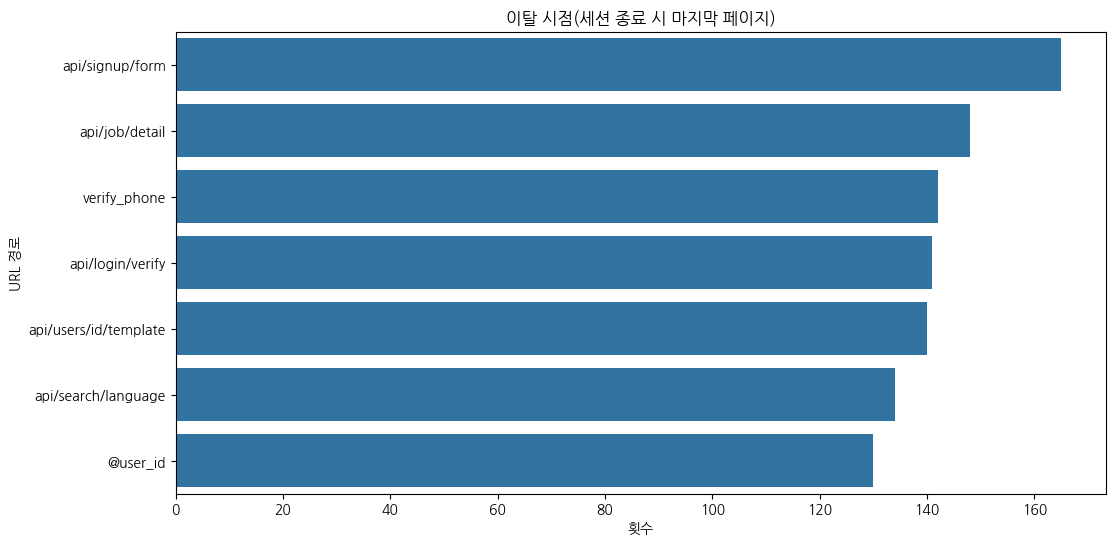

In [10]:
dummy_log_df["timestamp"] = pd.to_datetime(dummy_log_df["timestamp"])
dummy_log_df = dummy_log_df.sort_values(["user_uuid", "timestamp"])

# 세션 구분 (30분 이상 차이 날 경우 새 세션으로)
dummy_log_df["prev_time"] = dummy_log_df.groupby("user_uuid")["timestamp"].shift(1)
dummy_log_df["time_diff"] = (dummy_log_df["timestamp"] - dummy_log_df["prev_time"]).dt.total_seconds()
dummy_log_df["new_session"] = (dummy_log_df["time_diff"] > 1800) | (dummy_log_df["time_diff"].isna())
dummy_log_df["session_id"] = dummy_log_df.groupby("user_uuid")["new_session"].cumsum()

# 마지막에 어떤 페이지에서 머물렀는지 확인 (이탈 추정)
last_pages = dummy_log_df.groupby(["user_uuid", "session_id"]).tail(1)
exit_page_counts = last_pages["cleaned_url"].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=exit_page_counts.values, y=exit_page_counts.index)
plt.title("이탈 시점(세션 종료 시 마지막 페이지)")
plt.xlabel("횟수")
plt.ylabel("URL 경로")
plt.show()

- 이탈 시점(세션 종료 시 마지막 페이지)
    - 사용자가 더 이상 활동하지 않고 세션이 끝난 마지막 페이지를 집계한 것
    - 어떤 페이지에서 이탈이 자주 발생하는지를 보여줌

- 실제 데이터

|순위|URL 경로|의미 요약|이탈 추정 해석|
|---|---|---|---|
|1|api/(사용자)/(사용자 ID)/(템플릿)|사용자 맞춤 추천/템플릿 조회|검색 전 필터만 보고 떠난 경우|
|2|api/(채용 공고)/(직무)|직무 기반 채용공고 검색|특정 직무 검색 후 상세 공고로 안 넘어감|
|3|api/(채용 공고)/(채용 공고 ID)/other_jobs|비슷한 다른 공고 리스트|관심 공고 클릭 후 ‘다른 공고’ 추천만 보고 종료|
|4|@(사용자 ID)/(지원 내역)|지원 내역 조회|이전 지원 현황만 확인하고 종료|
|5|api/(기업)/(기업 ID)/view|기업 상세 페이지 열람|기업 정보만 보고 종료|
|6|(기업)/(기업 ID)/(채용 공고)|해당 기업의 채용공고 목록|기업 공고 목록만 보고 이탈|
|7|(채용 공고)/(채용 공고 ID)/id_title|개별 공고 상세|공고 내용만 확인하고 종료|
|8|@(사용자 ID)|사용자 프로필 페이지|자기 프로필 조회 후 아무 행동 없이 종료|
|9|@(사용자 ID)/(이력서)|이력서 편집/보기 페이지|이력서만 보고 종료|
|10|api/(기업)/(기업 ID)/member_list|기업 구성원 보기|팀원만 확인 후 이탈|

1. 검색/탐색 기반 페이지에서 이탈이 많음
- (템플릿), job_title, other_jobs, company jobs 등 검색 결과 페이지에서 세션이 끝난 비율 높음
    - 사용자가 흥미는 있었지만 다음 행동(지원/클릭 등)까지 이어지지 않은 것
    
    - 개선 포인트: 공고 클릭률 증가를 위한 UI 변경, 관심공고 저장 유도, 로그인 유도 등

2. 기업/공고 상세만 보고 이탈
- 기업 프로필(api/(기업)/(기업 ID)/view)이나 공고 상세((채용 공고)/(채용 공고 ID)/...)만 보고 떠나는 케이스 다수
    - 정보는 봤지만 행동 하지 않음

    - 개선 포인트: CTA(Call to Action) 강조, 추천공고 연결, 유사 기업 제안 등

3. 마이페이지/지원 이력 확인 후 이탈
- @(사용자 ID)/(지원 내역), @(사용자 ID), (이력서) 등 기존 유저가 자신의 정보만 확인하고 떠난 것으로 보임
    - 특정 목적(현황 확인)만 달성하고 나간 것

### 개선 방안

|시나리오|개선 아이디어|
|---|---|
|검색 페이지에서 이탈|"툴팁", "튜토리얼", "최근 본 공고", "좋아요 저장" 기능 도입으로 이어보기 유도|
|타겟팅 리마인드|장기간 이탈하는 유저(한 달 이상)는 이메일 등으로 다시 플랫폼을 소개하는 캠페인 시도|
|기업 프로필 이탈|"이 기업에 관심 있는 사람은 이런 기업도 봤어요" 유사기업 추천|
|공고 상세 후 이탈|"이력서 미완성 → 지금 완료하면 지원 가능" 식 유도|
|마이페이지 확인 후 이탈|지원 통계 시각화 + 이직 제안 큐레이션 제공|
|세션 행동 탐색|동일 행동 반복하는 유저 군을 클러스터링해서, 패턴 사용자별 행동 개선 설계 가능|